In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from main import CSR_KB
import timeit

In [2]:
def read_data(breakpoints):
    df = pd.read_csv('test1.csv')[:1000].reset_index(drop=True)
    
    exog = np.array([])
    endog = np.array([])
    prev_break = 0
    for _break in breakpoints:
        exog = np.append(exog, np.array(list(map(lambda x: [x], df[' timeExp'][prev_break:_break]))))
        endog = np.append(endog, np.array(list(map(lambda x: [x], df[' controller_x'][prev_break:_break]))))
        prev_break = _break

    return exog, endog

In [4]:
breakpoints = [0, 450, 500, 550, 610, 666, 710, 827, 941, 1000]

exog, endog = read_data(breakpoints)

weights =  np.arange(1, len(exog)+1)

seg_weights = np.arange(1, len(breakpoints))
seg_weights[5] = 100

C:\Users\sebas\AppData\Local\Temp\ipykernel_28844\1716257555.py:2: DtypeWarning: Columns (18,31,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('test1.csv')[:1000].reset_index(drop=True)


In [5]:
model = CSR_KB(endog, breakpoints, exog, weights = weights, seg_weights = seg_weights)
hasattr(model, 'betas')


False

In [6]:
betas = model.fit()

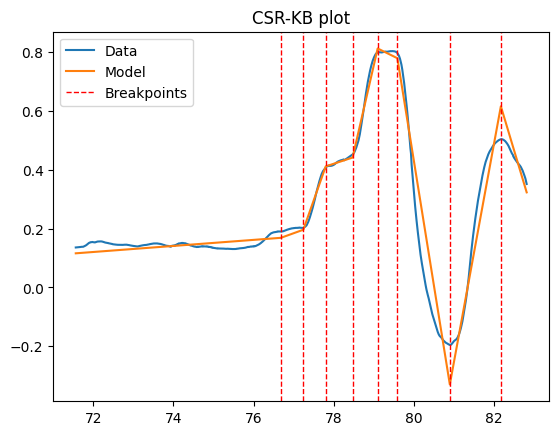

In [7]:
model.plot()

In [10]:
for method in ['qr', 'qr2', 'normal', 'svd']:
    print(method, timeit.timeit(lambda: model.fit(method=method), number = 10000))

qr 9.1249277
qr2 7.545471400000004
normal 12.709295599999997
svd 6.087263599999993
